# part 1

## 0. Load the Data

In [609]:
import pandas as pd 
import numpy as np 
df = pd.read_csv(r"C:\Users\ctlan\OneDrive\desktop\FIN\HW\HW3\Housing data.csv")
df = df.iloc[:-1]
df

,Date,Price,Address,City,Zip,Beds,Full Baths,Half Baths,Unit SF,Lot SF,...,Stories,End Unit,Basement,Subdivision,Miles,HOA Dues/Mo,HOA Amenities,ES,MS,HS
0,07/10/2022,"$337,000",609 Sweet Bay Ridge,Woodstock,30188.0,3.0,3.0,0.0,"1,538","1,742",...,3.0,Y,Daylight,Ridge at River Park,4.1,$90,Pool/Tennis,Woodstock,Woodstock,Woodstock
1,13/10/2022,"$735,000",909 S on Main Drive,"Woodstock,",30188.0,3.0,3.0,1.0,"3,548","4,792",...,3.0,N,N,South on Main,0.6,$235,Pool/Fitness,Woodstock,Woodstock,Woodstock
2,22/11/2022,"$460,265",243 Vista Lane,Woodstock,30189.0,3.0,3.0,1.0,"2,385","2,178",...,3.0,N,N,Towne Lake Hills,1.3,$170,NaN,Carmel,Woodstock,Woodstock
3,28/11/2022,"$559,900",409 Chandler Ln,"Woodstock,",30188.0,3.0,3.0,1.0,"2,300","1,307",...,3.0,N,N,South on Main,0.6,$235,Pool/Fitness,Woodstock,Woodstock,Woodstock
4,13/12/2022,"$409,990",200 Atkinson Way,Woodstock,30189.0,4.0,3.0,1.0,"1,873","2,396",...,3.0,Y,N,Addison Point,9.0,$135,NaN,Carmel,Woodstock,Woodstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,28/09/2023,"$435,000",368 Cherry Hill Lane,Woodstock,30188.0,3.0,2.0,1.0,"2,048","2,178",...,2.0,N,N,East of Main,2.0,$100,NaN,Little River,Mill Creek,River Ridge
134,29/09/2023,"$474,900",698 Stickley Oak Way,Woodstock,30189.0,3.0,2.0,1.0,"1,883","2,178",...,2.0,N,N,The Village at Towne Lake,1.3,$249,Pool/Fitness,Woodstock,Woodstock,Woodstock
135,29/09/2023,"$479,900",712 Stickley Oak Way,Woodstock,30189.0,3.0,2.0,1.0,"1,883","2,178",...,2.0,Y,N,The Village at Towne Lake,1.3,$249,Pool/Fitness,Woodstock,Woodstock,Woodstock
136,02/10/2023,"$468,900",710 Stickley Oak Way,Woodstock,30189.0,3.0,2.0,1.0,"1,849","2,178",...,2.0,N,N,The Village at Towne Lake,1.3,$249,Pool/Fitness,Woodstock,Woodstock,Woodstock


# 1.EDA part

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           138 non-null    object 
 1   Price          138 non-null    object 
 2   Address        138 non-null    object 
 3   City           138 non-null    object 
 4   Zip            137 non-null    float64
 5   Beds           138 non-null    float64
 6   Full Baths     138 non-null    float64
 7   Half Baths     138 non-null    float64
 8   Unit SF        138 non-null    object 
 9   Lot SF         138 non-null    object 
 10  Year Built     138 non-null    float64
 11  Other          28 non-null     object 
 12  Parking        138 non-null    object 
 13  Stories        138 non-null    float64
 14  End Unit       138 non-null    object 
 15  Basement       138 non-null    object 
 16  Subdivision    138 non-null    object 
 17  Miles          138 non-null    float64
 18  HOA Dues/M

In [604]:
df.describe()

,Zip,Beds,Full Baths,Half Baths,Year Built,Stories,Miles
count,137.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,30186.445255,3.260870,2.536232,0.978261,2020.536232,2.326087,3.377536
std,9.129719,0.487873,0.514880,0.255377,3.120826,0.511375,2.899736
min,30144.000000,2.000000,2.000000,0.000000,2005.000000,1.000000,0.000000
25%,30188.000000,3.000000,2.000000,1.000000,2020.000000,2.000000,1.300000
50%,30188.000000,3.000000,3.000000,1.000000,2021.000000,2.000000,2.300000
75%,30189.000000,4.000000,3.000000,1.000000,2022.000000,3.000000,4.000000
max,30189.000000,5.000000,4.000000,2.000000,2023.000000,4.000000,9.000000


In [605]:
categorical_columns = df.select_dtypes(include=['object']).columns

distinct_counts = df[categorical_columns].nunique()

distinct_counts

Date              95
Price            104
Address          138
City               3
Unit SF           82
Lot SF            38
Other              1
Parking            4
End Unit           2
Basement           2
Subdivision       29
HOA Dues/Mo       23
HOA Amenities      5
ES                 7
MS                 3
HS                 3
dtype: int64

# 2.  Feature Engineering 

In [606]:
category_columns = ['City', 'Other', 'End Unit', 'Basement', 'HOA Amenities', 'ES', 'MS', 'HS']

for column in category_columns:
    print(f"Unique values in {column}: {df[column].unique()}")

print(f"Unique values in {'Zip'}: {df['Zip'].unique()}")

Unique values in City: ['Woodstock' 'Woodstock,' 'Kennessaw']
Unique values in Other: [nan 'Semi-detatched']
Unique values in End Unit: ['Y' 'N']
Unique values in Basement: ['Daylight' 'N']
Unique values in HOA Amenities: ['Pool/Tennis' 'Pool/Fitness' nan 'Gated' 'Pool' 'none']
Unique values in ES: ['Woodstock' 'Carmel' 'Arnold Mill' 'Little River' 'Johnston' 'Pitner'
 'Johnston ES']
Unique values in MS: ['Woodstock' 'Mill Creek' 'Palmer']
Unique values in HS: ['Woodstock' 'River Ridge' 'Kell']
Unique values in Zip: [30188. 30189.    nan 30144.]


In [610]:
#change some categorical to numerical 
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True).astype(float)
df['HOA Dues/Mo'] = df['HOA Dues/Mo'].str.replace('[$,]', '', regex=True).astype(float)
df['Unit SF'] = df['Unit SF'].str.replace(',', '').astype(float)
df['Lot SF'] = df['Lot SF'].str.replace(',', '').astype(float)
df['Parking'] = df['Parking'].str[0].astype(int)
# Rename the column from 'Other' to 'detatched'
df['detatched'] = np.where(df['Other'].isna(), 0, 1)
df.drop(['Other'], axis=1, inplace=True)

# Convert the 'End Unit' column: replace 'N' with 0 and the others ('Y') with 1.
df['End Unit'] = np.where(df['End Unit'] == 'N', 0, 1)

# Convert the 'Basement' column: replace 'N' with 0 and the others ('Daylight') with 1.
df['Basement'] = np.where(df['Basement'] == 'N', 0, 1)

df['detatched'] = df['detatched'].astype(int)
df['End Unit'] = df['End Unit'].astype(int)
df['Basement'] = df['Basement'].astype(int)

df['City'] = df['City'].replace({'Woodstock,': 'Woodstock'})
df['ES'] = df['ES'].replace({'Johnston ES': 'Johnston'})


# Numeric value coded for City column
city_mapping = {'Woodstock': 0, 'Kennessaw': 1}
df['City'] = df['City'].map(city_mapping)

# Numeric value coded for ES column
ES_mapping = {'Woodstock': 0,'Carmel':1,'Arnold Mill':2,'Little River':3,'Johnston':4,'Pitner':5}
df['ES'] = df['ES'].map(ES_mapping)

# Numeric value coded for MS column
MS_mapping = {'Woodstock':0,'Mill Creek':1,'Palmer':2}
df['MS'] = df['MS'].map(MS_mapping)

# Numeric value coded for HS column
HS_mapping = {'Woodstock':0,'River Ridge':1, 'Kell':2}
df['HS'] = df['HS'].map(HS_mapping)

#replace Zip
df['Zip'] = df['Zip'].replace({30188: 0, 30189: 1, 30144: 2})




# One-hot encoding the 'HOA Amenities' feature, splitting compound features
df['HOA Amenities'] = df['HOA Amenities'].replace({'none': np.nan})
df['Pool'] = df['HOA Amenities'].str.contains('Pool').fillna(0).astype(int)
df['Tennis'] = df['HOA Amenities'].str.contains('Tennis').fillna(0).astype(int)
df['Fitness'] = df['HOA Amenities'].str.contains('Fitness').fillna(0).astype(int)
df['Gated'] = df['HOA Amenities'].str.contains('Gated').fillna(0).astype(int)

df.drop(['HOA Amenities'], axis=1, inplace=True)
df.drop(['Address'], axis=1, inplace=True)
df.drop(['Subdivision'], axis=1, inplace=True)
df.drop(['Date'], axis=1, inplace=True)

### Feature Transformations Explained

1. **Handling Missing Values in `Zip`**:
   - `df = df.dropna(subset=['Zip']).reset_index(drop=True)`
   - This line removes rows where the `Zip` column contains missing values (`NaN`), which is essential for maintaining data integrity. `reset_index(drop=True)` is used to reset the DataFrame index after dropping rows to ensure the index remains continuous.

2. **Converting `Price` to Numeric**:
   - `df['Price'] = df['Price'].str.replace('[$,]', '', regex=True).astype(float)`
   - The `Price` column is originally stored as a string with currency symbols and commas. This transformation removes any dollar signs and commas and converts the column into a float data type, which is necessary for any calculations or model training involving house prices.

3. **Converting `HOA Dues/Mo` to Numeric**:
   - `df['HOA Dues/Mo'] = df['HOA Dues/Mo'].str.replace('[$,]', '', regex=True).astype(float)`
   - Similar to `Price`, the `HOA Dues/Mo` (Homeowners Association Dues per Month) is also stored as a string with currency formatting. This line standardizes it to a float by removing non-numeric characters, allowing for numerical operations and analysis.

4. **Converting `Unit SF` and `Lot SF` to Numeric**:
   - `df['Unit SF'] = df['Unit SF'].str.replace(',', '').astype(float)`
   - `df['Lot SF'] = df['Lot SF'].str.replace(',', '').astype(float)`
   - These columns represent the square footage but are stored with commas as thousands separators. Removing commas and converting these columns to float data types is crucial for accurate mathematical operations and ensures they are treated as quantitative measurements in analyses.

5. **Transforming `Parking` from String to Numeric**:
   - `df['Parking'] = df['Parking'].str[0].astype(int)`
   - If `Parking` contains values like "1-car garage", this code extracts the first character and converts it to an integer, reflecting the number of parking spaces numerically. This conversion facilitates straightforward numerical analysis and comparisons.

6. **Binary Processing**:
   - Converting features to binary values (0 and 1) simplifies the model training process. Binary features reduce the complexity of the data, making model training more efficient and interpretable.

7. **Handling Missing Values**:
   - For missing values (`nan`) in the `Other` feature, we treat them as a separate category (0). In house price prediction, missing information might indicate the absence of a feature, so assigning a distinct category can help the model better understand this aspect.

8. **Column Renaming**:
   - The `Other` column was renamed to `Detached` to clarify that this column now represents information about "whether or not it is a detached property." This helps in providing clearer insights and interpretation of the feature's impact on house prices.

9. **Merging Similar Values**:
   - Correcting inconsistencies in entries such as 'Woodstock,' to 'Woodstock' and 'Johnston ES' to 'Johnston' ensures the model does not treat identical values as different due to typographical errors or naming variations. This adjustment is crucial for maintaining model accuracy and consistency.

10. **Numeric Encoding**:
   - Numeric encoding of categorical data such as 'City', 'ES', 'MS', 'HS' (e.g., 'Woodstock' to 0, 'Kennesaw' to 1) is essential because many machine learning algorithms require numerical input. This encoding facilitates operations like distance calculation and mean computation, which are integral to the functionality of many algorithms.

11. **One-Hot Encoding for HOA Amenities**:
   - Splitting compound features in 'HOA Amenities' into separate binary features such as 'Pool', 'Tennis', 'Fitness', and 'Gated' allows the model to assess the impact of each amenity on house prices independently. This detailed approach helps identify specific features that might enhance property values, thereby improving prediction accuracy.

12. **Dropping the Original 'HOA Amenities' Column**:
   - After extracting essential information into binary features, the original 'HOA Amenities' column becomes redundant and is dropped to reduce the feature space. This step helps avoid multicollinearity, where highly correlated variables can affect the model’s effectiveness and interpretation adversely.

#### Overall Benefits
   - These transformations clean, format, and optimize the data for predictive modeling. They ensure that the features used in the model are meaningful and interpretable, enhancing the model's predictive capabilities and allowing it to make more nuanced predictions based on the structured and cleaned data.



## 2.1 Target Encoding  subdivision

In [591]:
categorical_columns = df.select_dtypes(include=['object']).columns

distinct_counts = df[categorical_columns].nunique()

distinct_counts

Series([], dtype: float64)

#### Cross-Validation
- **Robustness**: Cross-validation is a powerful method to estimate the performance of a model with a more robust validation mechanism. By splitting the data into `N` parts and iteratively using each part as a test set while the remaining serve as the training set, it provides a thorough way of understanding how well the model performs across different subsets of the dataset.
- **Reduce Overfitting**: It helps in minimizing the risk of overfitting as the model is validated multiple times across different subsets of the data, ensuring the model's ability to generalize to unseen data.

#### Target Encoding
- **Efficient Handling of Categorical Data**: Target encoding transforms categorical data into a numerical format by assigning values based on the mean of the target variable for each category. This is particularly useful for categories with a lot of unique values or for datasets where categorical data is heavily tied to the target variable.
- **Prevent Data Leakage**: By fitting the encoder on the training set and transforming both the training and test sets during each cross-validation fold, we prevent data leakage. It ensures that the model does not inadvertently learn information from the test set.
- **Improvement in Model Performance**: Target encoding can lead to better model performance especially in cases where categorical variables are predictive of the outcome because it provides a meaningful way to include this information in the model.

Using both of these techniques in conjunction not only improves model accuracy but also ensures that the performance metrics are more reliable and indicative of how the model will perform in real-world scenarios.


In [592]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from category_encoders import TargetEncoder



def cross_validation_with_target_encoding_split(df, N):
    # Prepare for cross-validation
    kf = KFold(n_splits=N, shuffle=True, random_state=42)

    # Execute cross-validation
    for train_index, test_index in kf.split(df):
        # Split the data
        X_train, X_test = df.loc[train_index], df.loc[test_index]
        y_train, y_test = df['Price'].iloc[train_index], df['Price'].iloc[test_index]
        
        # Apply target encoding
        encoder = TargetEncoder()
        X_train['Subdivision'] = X_train_encoded = encoder.fit_transform(X_train['Subdivision'], y_train)
        X_test['Subdivision'] = encoder.transform(X_test['Subdivision'])
        return X_train, X_test, y_train, y_test
        




In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        138 non-null    float64
 1   City         138 non-null    int64  
 2   Zip          137 non-null    float64
 3   Beds         138 non-null    float64
 4   Full Baths   138 non-null    float64
 5   Half Baths   138 non-null    float64
 6   Unit SF      138 non-null    float64
 7   Lot SF       138 non-null    float64
 8   Year Built   138 non-null    float64
 9   Parking      138 non-null    int32  
 10  Stories      138 non-null    float64
 11  End Unit     138 non-null    int32  
 12  Basement     138 non-null    int32  
 13  Miles        138 non-null    float64
 14  HOA Dues/Mo  138 non-null    float64
 15  ES           138 non-null    int64  
 16  MS           138 non-null    int64  
 17  HS           138 non-null    int64  
 18  detatched    138 non-null    int32  
 19  Pool    

# 3. Scaling

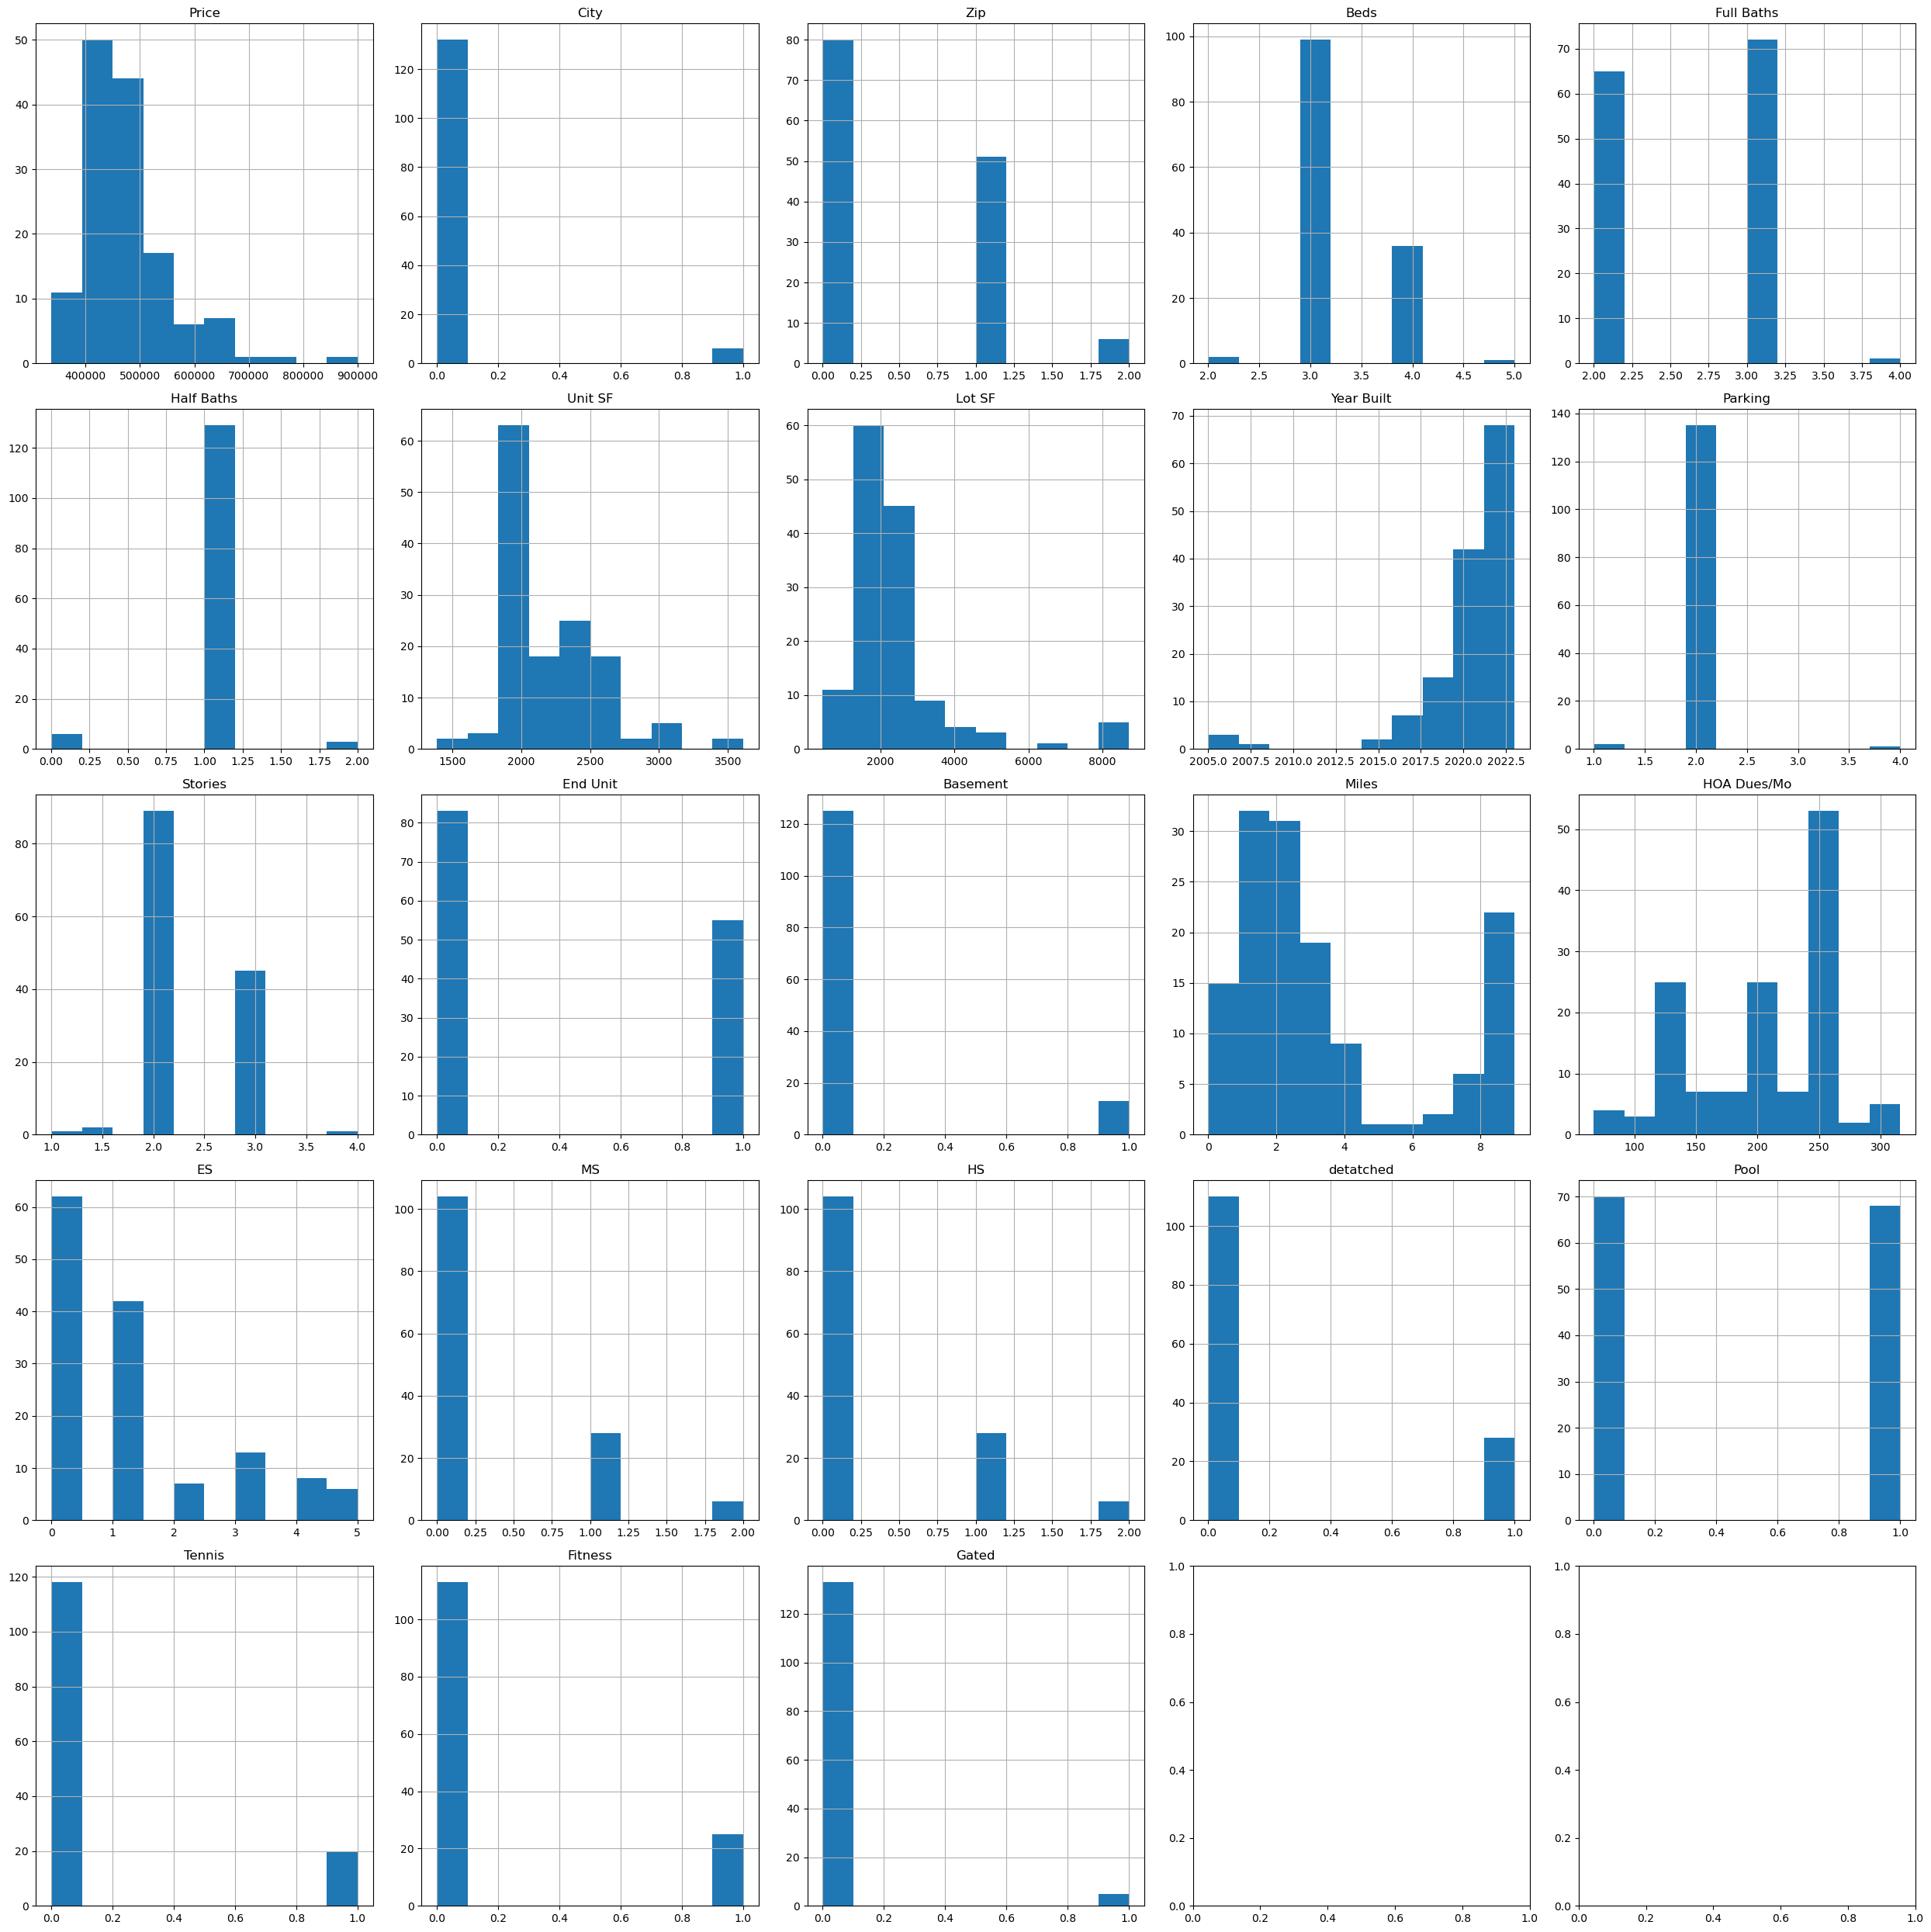

In [594]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns needed to display all histograms
n = int(len(numerical_cols)**0.5) + 1

# Create multiple subplots
fig, ax = plt.subplots(n, n, figsize=(n*5, n*5))

# Loop through all numerical columns and plot histograms in subplots
for i, col in enumerate(numerical_cols):
    row = i // n
    col_n = i % n
    df[col].hist(ax=ax[row, col_n])
    ax[row, col_n].title.set_text(col)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


In [595]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select columns to scale
columns_to_scale = ['Unit SF', 'Lot SF', 'Miles', 'HOA Dues/Mo']
X = df[columns_to_scale]

# Fit and transform the selected columns
X_scaled = scaler.fit_transform(X)

# Assign the scaled data back to the original DataFrame
df[columns_to_scale] = X_scaled


### Explanation for Scaling Selected Features

In the predictive modeling of house prices, it is essential to scale features to ensure that all of them contribute equally to the analysis, especially when using algorithms that are sensitive to feature magnitude. Here's why the specific features 'Unit SF', 'Lot SF', 'Miles', and 'HOA Dues/Mo' were chosen for scaling:

1. **Unit SF (Unit Square Footage)**:
   - Represents the total area of the housing unit.
   - Scaling this feature helps in normalizing the size dimensions across all units, which varies significantly from one property to another.

2. **Lot SF (Lot Square Footage)**:
   - Indicates the total area of the land on which the house is built.
   - Similar to 'Unit SF', the lot size can vary extensively between different properties, making scaling crucial to balance the influence of this feature relative to others in the dataset.

3. **Miles (Distance from a significant location or city center)**:
   - Distance can impact the house price due to factors like accessibility and desirability of the location.
   - Scaling distances is important as it standardizes this spatial information, allowing for a more balanced and proportional comparison in the model's calculations.

4. **HOA Dues/Mo (Homeowners Association Dues per Month)**:
   - Represents a recurring monthly expense associated with the property.
   - The dues can vary depending on the services and amenities provided. Scaling these values ensures that higher fees do not disproportionately affect the model's outcome due to their numeric magnitude compared to other features.

#### Importance of Scaling
- **Model Sensitivity**: Algorithms like Linear Regression and SVM are sensitive to the scale of the input data. Features with larger ranges could dominate the model's learning process, leading to biased results.
- **Gradient Descent Efficiency**: For models that use gradient descent as an optimization technique, features on similar scales allow the algorithm to converge more quickly and effectively.

By scaling these specific features, the model can more accurately interpret the relative importance of each feature without bias from varying numeric ranges. This results in a more reliable and robust predictive model.


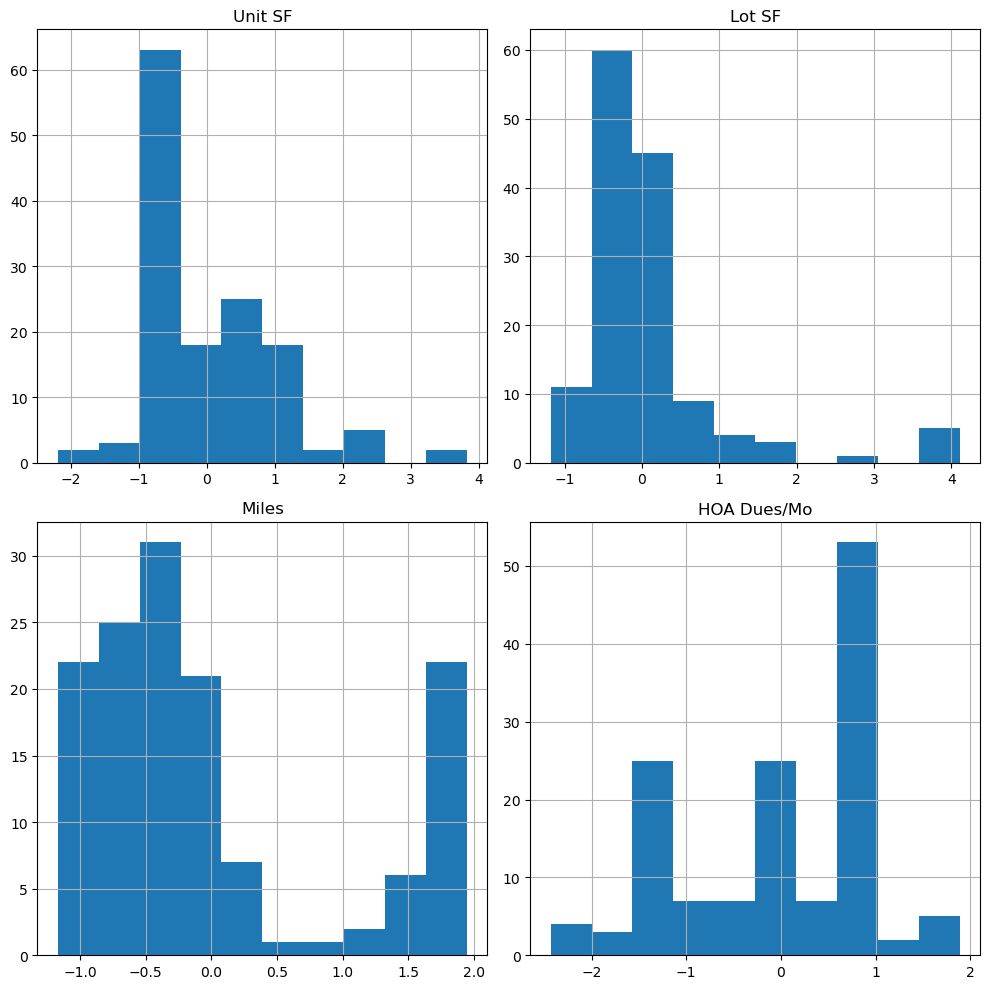

In [596]:
import pandas as pd
import matplotlib.pyplot as plt

# Select specific numerical columns
cols = ['Unit SF', 'Lot SF', 'Miles', 'HOA Dues/Mo']

# Calculate the number of rows and columns needed to display all histograms
n = int(len(cols)**0.5) 

# Create multiple subplots
fig, ax = plt.subplots(n, n, figsize=(n*5, n*5))

# Loop through selected columns and plot histograms in subplots
for i, col in enumerate(cols):
    row = i // n
    col_n = i % n
    df[col].hist(ax=ax[row, col_n])
    ax[row, col_n].title.set_text(col)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


# 4. Modeling 

## 4.1 Feature Correlation

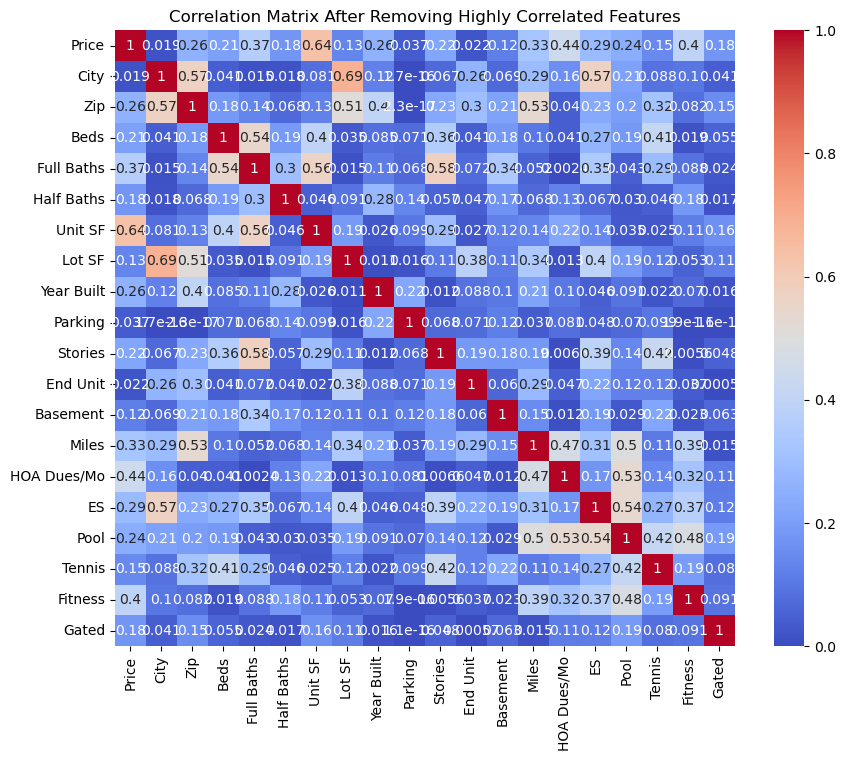

Columns to be dropped due to high correlation (>0.8): ['MS', 'HS', 'detatched']


In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Generate a correlation matrix for numeric columns only
corr_matrix = numeric_df.corr().abs()

# Find pairs of highly correlated features (correlation greater than 0.8)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Remove these columns from the DataFrame
df_reduced = numeric_df.drop(to_drop, axis=1)

# Re-calculate the correlation matrix for the reduced DataFrame
corr_matrix_reduced = df_reduced.corr().abs()

# Plotting the reduced correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix After Removing Highly Correlated Features')
plt.show()
print("Columns to be dropped due to high correlation (>0.8):", to_drop)

## 4.2 Feature Selection 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Split data into training and testing sets
X_train, X_test, y_train, y_test = cross_validation_with_target_encoding_split(df,5)

# Initialize the base model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the model and desired number of features
rfe = RFE(estimator=model, n_features_to_select=15, step=1)

# Fit RFE
rfe.fit(X_train, y_train.values.ravel())

# Print the results
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

# Create a DataFrame to view the selected features and their rankings
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns), 'Ranking':rfe.ranking_})
print(selected_features_df.sort_values(by='Ranking'))

In [ ]:
# Create a DataFrame to view the selected features and their rankings
selected_features_df = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

# Print selected features
print("Selected Features:")
print(selected_features_df[selected_features_df['Selected'] == True])


Selected Features:
        Feature  Selected  Ranking
0         Price      True        1
3          Beds      True        1
6       Unit SF      True        1
7        Lot SF      True        1
8    Year Built      True        1
10      Stories      True        1
11     End Unit      True        1
12     Basement      True        1
13  Subdivision      True        1
14        Miles      True        1
15  HOA Dues/Mo      True        1
20         Pool      True        1
21       Tennis      True        1
24         year      True        1
25        month      True        1


In [ ]:
df

,Price,Beds,Unit SF,Stories,Miles,HOA Dues/Mo,Pool,Half Baths,Full Baths,Parking
0,337000.0,3.0,-1.788381,3.0,0.245444,-2.025587,1,0.0,3.0,1
1,735000.0,3.0,3.641478,3.0,-0.962877,0.479910,1,1.0,3.0,2
2,460265.0,3.0,0.499724,3.0,-0.721213,-0.643244,0,1.0,3.0,2
3,559900.0,3.0,0.270103,3.0,-0.962877,0.479910,1,1.0,3.0,2
4,409990.0,4.0,-0.883405,3.0,1.937095,-1.248019,0,1.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...
132,435000.0,3.0,-0.410656,2.0,-0.479549,-1.852794,0,1.0,2.0,2
133,474900.0,3.0,-0.856390,2.0,-0.721213,0.721820,1,1.0,2.0,2
134,479900.0,3.0,-0.856390,2.0,-0.721213,0.721820,1,1.0,2.0,2
135,468900.0,3.0,-0.948239,2.0,-0.721213,0.721820,1,1.0,2.0,2


## 4.3 Build Model

In [617]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
df1 = df.copy()

X = df1.drop('Price', axis=1)
y = df1['Price']

# Fit Random Forest to get feature importance
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X, y)

# Select features based on importance
selector = SelectFromModel(forest, prefit=True)
X_important = selector.transform(X)

# Get the names of the most important features
important_feature_names = np.array(X.columns)[selector.get_support()]

print("Most important features:", important_feature_names)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [612]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Unit SF', 'Lot SF', 'Miles', 'HOA Dues/Mo']
X = df[columns_to_scale]

X_scaled = scaler.fit_transform(X)

df[columns_to_scale] = X_scaled

In [613]:
df2 = df[['Price','Unit SF','Lot SF','Miles','HOA Dues/Mo']]
df2

df3 = df[['Price','Unit SF','Lot SF','Miles','HOA Dues/Mo','Beds','Pool','Tennis','Fitness','Gated','Beds','Full Baths','Half Baths']]
df3

,Price,Unit SF,Lot SF,Miles,HOA Dues/Mo,Beds,Pool,Tennis,Fitness,Gated,Beds,Full Baths,Half Baths
0,337000.0,-1.790471,-0.346087,0.250056,-2.031943,3.0,1,1,0,0,3.0,3.0,0.0
1,735000.0,3.655391,1.601921,-0.961348,0.482539,3.0,1,0,1,0,3.0,3.0,1.0
2,460265.0,0.504377,-0.067618,-0.719067,-0.644642,3.0,0,0,0,0,3.0,3.0,1.0
3,559900.0,0.274080,-0.623918,-0.961348,0.482539,3.0,1,0,1,0,3.0,3.0,1.0
4,409990.0,-0.882827,0.071617,1.946021,-1.251586,4.0,0,0,0,0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,435000.0,-0.408685,-0.067618,-0.476786,-1.858530,3.0,0,0,0,0,3.0,2.0,1.0
134,474900.0,-0.855733,-0.067618,-0.719067,0.725317,3.0,1,0,1,0,3.0,2.0,1.0
135,479900.0,-0.855733,-0.067618,-0.719067,0.725317,3.0,1,0,1,0,3.0,2.0,1.0
136,468900.0,-0.947853,-0.067618,-0.719067,0.725317,3.0,1,0,1,0,3.0,2.0,1.0


In [614]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

X = df2.drop('Price', axis=1)
y = df2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Function to perform cross-validated training and evaluation
def train_and_evaluate_cv(model, X, y, cv=5):
    # Perform cross-validation for MAE
    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    mae_mean = np.mean(mae_scores)
    r2_mean = np.mean(r2_scores)
    return mae_mean, r2_mean

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(random_state=0),
    'SVM': SVR(),
    'Neural Network': MLPRegressor(max_iter=500, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=0)
}

# Train and evaluate models using cross-validation
results_cv = {}
for name, model in models.items():
    results_cv[name] = train_and_evaluate_cv(model, X, y)

# Print results
for model, metrics in results_cv.items():
    print(f"{model} - Cross-Validated MAE: {metrics[0]:.2f}, R²: {metrics[1]:.2f}")

# Example of parameter tuning using GridSearchCV for Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)
print("Best parameters for Ridge Regression:", grid_search.best_params_)
print("Best cross-validated MAE:", -grid_search.best_score_)


c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Linear Regression - Cross-Validated MAE: 45155.22, R²: 0.30
Ridge Regression - Cross-Validated MAE: 45084.05, R²: 0.30
Lasso Regression - Cross-Validated MAE: 45154.96, R²: 0.30
Decision Tree - Cross-Validated MAE: 38391.98, R²: 0.46
Random Forest - Cross-Validated MAE: 28547.54, R²: 0.72
SVM - Cross-Validated MAE: 60569.29, R²: -0.21
Neural Network - Cross-Validated MAE: 475995.81, R²: -44.77
Gradient Boosting - Cross-Validated MAE: 28819.85, R²: 0.72
Best parameters for Ridge Regression: {'alpha': 10.0}
Best cross-validated MAE: 44815.61242396892


In [615]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Adding constant to the features for the intercept term
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Printing summary results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     36.12
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           2.06e-20
Time:                        14:51:02   Log-Likelihood:                -1706.8
No. Observations:                 138   AIC:                             3424.
Df Residuals:                     133   BIC:                             3438.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.758e+05   4933.334     96.454      

In [616]:
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the base models
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Define the final estimator
final_estimator = LinearRegression()

# Create the stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5)

# Define the parameter grid
param_grid = {
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_depth': [10, 20],
    'gradient_boosting__n_estimators': [100, 200],
    'gradient_boosting__learning_rate': [0.1, 0.2]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(stacked_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Extract the Linear Regression model as final estimator
final_lr_model = best_model.final_estimator_

# Make predictions and evaluate the model
predictions = best_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Assuming X_test is a numpy array and not a dataframe, we need to add a constant manually for statsmodels
X_test_sm = sm.add_constant(X_test)
ols = sm.OLS(y_test, X_test_sm).fit()

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print("\nLinear Regression Coefficients:")
print(final_lr_model.coef_)
print("\nOLS Summary:")
print(ols.summary())


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__n_estimators': 200, 'random_forest__max_depth': 20, 'random_forest__n_estimators': 200}
Mean Absolute Error: 33838.09
R² Score: 0.71

Linear Regression Coefficients:
[0.27643675 0.80142393]

OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     5.020
Date:                Thu, 18 Apr 2024   Prob (F-statistic):            0.00467
Time:                        14:51:24   Log-Likelihood:                -348.34
No. Observations:                  28   AIC:                             706.7
Df Residuals:                      23   BIC:                             713.3
Df Model:               

# Part2 

In [6]:
import pandas as pd 
import numpy as np 
df = pd.read_csv(r"C:\Users\ctlan\OneDrive\desktop\FIN\HW\HW3\Housing data.csv")
df = df.iloc[:-1]
df = df.dropna(subset=['Zip']).reset_index(drop=True)

#change some categorical to numerical 
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True).astype(float)
df['HOA Dues/Mo'] = df['HOA Dues/Mo'].str.replace('[$,]', '', regex=True).astype(float)
df['Unit SF'] = df['Unit SF'].str.replace(',', '').astype(float)
df['Lot SF'] = df['Lot SF'].str.replace(',', '').astype(float)
df['Parking'] = df['Parking'].str[0].astype(int)
# Rename the column from 'Other' to 'detatched'
df['detatched'] = np.where(df['Other'].isna(), 0, 1)
df.drop(['Other'], axis=1, inplace=True)

# Convert the 'End Unit' column: replace 'N' with 0 and the others ('Y') with 1.
df['End Unit'] = np.where(df['End Unit'] == 'N', 0, 1)

# Convert the 'Basement' column: replace 'N' with 0 and the others ('Daylight') with 1.
df['Basement'] = np.where(df['Basement'] == 'N', 0, 1)

df['detatched'] = df['detatched'].astype(int)
df['End Unit'] = df['End Unit'].astype(int)
df['Basement'] = df['Basement'].astype(int)

df['City'] = df['City'].replace({'Woodstock,': 'Woodstock'})
df['ES'] = df['ES'].replace({'Johnston ES': 'Johnston'})


# Numeric value coded for City column
city_mapping = {'Woodstock': 0, 'Kennessaw': 1}
df['City'] = df['City'].map(city_mapping)

# Numeric value coded for ES column
ES_mapping = {'Woodstock': 0,'Carmel':1,'Arnold Mill':2,'Little River':3,'Johnston':4,'Pitner':5}
df['ES'] = df['ES'].map(ES_mapping)

# Numeric value coded for MS column
MS_mapping = {'Woodstock':0,'Mill Creek':1,'Palmer':2}
df['MS'] = df['MS'].map(MS_mapping)

# Numeric value coded for HS column
HS_mapping = {'Woodstock':0,'River Ridge':1, 'Kell':2}
df['HS'] = df['HS'].map(HS_mapping)

#replace Zip
df['Zip'] = df['Zip'].replace({30188: 0, 30189: 1, 30144: 2})




# One-hot encoding the 'HOA Amenities' feature, splitting compound features
df['HOA Amenities'] = df['HOA Amenities'].replace({'none': np.nan})
df['Pool'] = df['HOA Amenities'].str.contains('Pool').fillna(0).astype(int)
df['Tennis'] = df['HOA Amenities'].str.contains('Tennis').fillna(0).astype(int)
df['Fitness'] = df['HOA Amenities'].str.contains('Fitness').fillna(0).astype(int)
df['Gated'] = df['HOA Amenities'].str.contains('Gated').fillna(0).astype(int)

df.drop(['HOA Amenities'], axis=1, inplace=True)
df.drop(['Address'], axis=1, inplace=True)
df.drop(['Subdivision'], axis=1, inplace=True)
df.drop(['Date'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Unit SF', 'Lot SF', 'Miles', 'HOA Dues/Mo']
X = df[columns_to_scale]

X_scaled = scaler.fit_transform(X)

df[columns_to_scale] = X_scaled

In [8]:
df3 = df[['Price','Unit SF','Miles','HOA Dues/Mo','Beds','Pool','Full Baths','Half Baths']]
df3

,Price,Unit SF,Miles,HOA Dues/Mo,Beds,Pool,Full Baths,Half Baths
0,337000.0,-1.788381,0.245444,-2.025587,3.0,1,3.0,0.0
1,735000.0,3.641478,-0.962877,0.479910,3.0,1,3.0,1.0
2,460265.0,0.499724,-0.721213,-0.643244,3.0,0,3.0,1.0
3,559900.0,0.270103,-0.962877,0.479910,3.0,1,3.0,1.0
4,409990.0,-0.883405,1.937095,-1.248019,4.0,0,3.0,1.0
...,...,...,...,...,...,...,...,...
132,435000.0,-0.410656,-0.479549,-1.852794,3.0,0,2.0,1.0
133,474900.0,-0.856390,-0.721213,0.721820,3.0,1,2.0,1.0
134,479900.0,-0.856390,-0.721213,0.721820,3.0,1,2.0,1.0
135,468900.0,-0.948239,-0.721213,0.721820,3.0,1,2.0,1.0


## a)

In [11]:
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

y = df3['Price']
X = df3.drop('Price', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the base models
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Define the final estimator
final_estimator = LinearRegression()

# Create the stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5)

# Define the parameter grid
param_grid = {
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_depth': [10, 20],
    'gradient_boosting__n_estimators': [100, 200],
    'gradient_boosting__learning_rate': [0.1, 0.2]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(stacked_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Extract the Linear Regression model as final estimator
final_lr_model = best_model.final_estimator_

# Make predictions and evaluate the model
predictions = best_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Assuming X_test is a numpy array and not a dataframe, we need to add a constant manually for statsmodels
X_test_sm = sm.add_constant(X_test)
ols = sm.OLS(y_test, X_test_sm).fit()

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print("\nLinear Regression Coefficients:")
print(final_lr_model.coef_)
print("\nOLS Summary:")
print(ols.summary())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'gradient_boosting__learning_rate': 0.2, 'gradient_boosting__n_estimators': 100, 'random_forest__max_depth': 10, 'random_forest__n_estimators': 200}
Mean Absolute Error: 26382.52
R² Score: 0.71

Linear Regression Coefficients:
[0.66283026 0.39916263]

OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7.017
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           0.000273
Time:                        16:16:29   Log-Likelihood:                -336.30
No. Observations:                  28   AIC:                             688.6
Df Residuals:                      20   BIC:                             699.3
Df Model:               

### use the stacking model to predict the base units

In [12]:
base_unit_features = np.array([[1800, 0.5, 240, 3, 1, 2, 1]])

# Make prediction using the best model from GridSearch
predicted_price = best_model.predict(base_unit_features)  # Use base_unit_features_df if using DataFrame

print(f"Predicted Price for the base unit: ${predicted_price[0]:,.2f}")

Predicted Price for the base unit: $662,027.75


c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## b)

In [13]:
import numpy as np

# Base unit features: ['Unit SF', 'Miles', 'HOA Dues/Mo', 'Beds', 'Pool', 'Full Baths', 'Half Baths']
base_features = np.array([[1800, 0.5, 240, 3, 1, 2, 1]])

# Predict the base price
base_price = best_model.predict(base_features)[0]

# Calculate the price with one additional full bathroom
features_with_extra_bath = base_features.copy()
features_with_extra_bath[0, 5] += 1  # Adding one more to 'Full Baths'
price_with_extra_bath = best_model.predict(features_with_extra_bath)[0]

# Calculate the price with closer proximity to downtown
features_closer_downtown = base_features.copy()
features_closer_downtown[0, 1] = 0.25  # Closer to downtown
price_closer_downtown = best_model.predict(features_closer_downtown)[0]

# Calculate marginal values
marginal_value_bathroom = price_with_extra_bath - base_price
marginal_value_proximity = price_closer_downtown - base_price

print(f"Marginal Value of an Additional Full Bathroom: ${marginal_value_bathroom:,.2f}")
print(f"Marginal Value of Closer Proximity to Downtown Woodstock: ${marginal_value_proximity:,.2f}")


Marginal Value of an Additional Full Bathroom: $850.76
Marginal Value of Closer Proximity to Downtown Woodstock: $2,408.00


c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.p

## c)

c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ctlan\anaconda3\lib\site-packages\sklearn\base.p

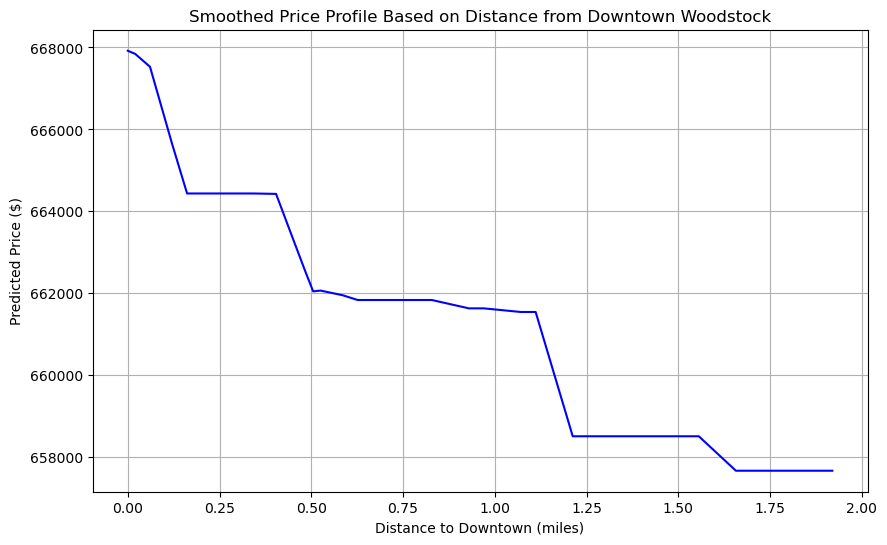

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'best_model' is already defined and trained

# Define the baseline features for the unit
base_features = np.array([[1800, 0.5, 240, 3, 1, 2, 1]])

# Define a range of distances and a window size for averaging
distances = np.linspace(0, 2, 100)  # Distance range
window_size = 5  # Averaging window size (number of points to average over)

# Prices based on different distances
raw_prices = []
for d in distances:
    temp_features = base_features.copy()
    temp_features[0, 1] = d  # Update distance
    predicted_price = best_model.predict(temp_features)[0]
    raw_prices.append(predicted_price)

# Smooth the predictions by averaging over a sliding window
smooth_prices = np.convolve(raw_prices, np.ones(window_size)/window_size, mode='valid')

# Adjust distances for plotting the smoothed prices
# Since convolution reduces the array size, we trim the distances array to match
adjusted_distances = distances[:len(smooth_prices)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(adjusted_distances, smooth_prices, linestyle='-', color='b')
plt.title('Smoothed Price Profile Based on Distance from Downtown Woodstock')
plt.xlabel('Distance to Downtown (miles)')
plt.ylabel('Predicted Price ($)')
plt.grid(True)
plt.show()
